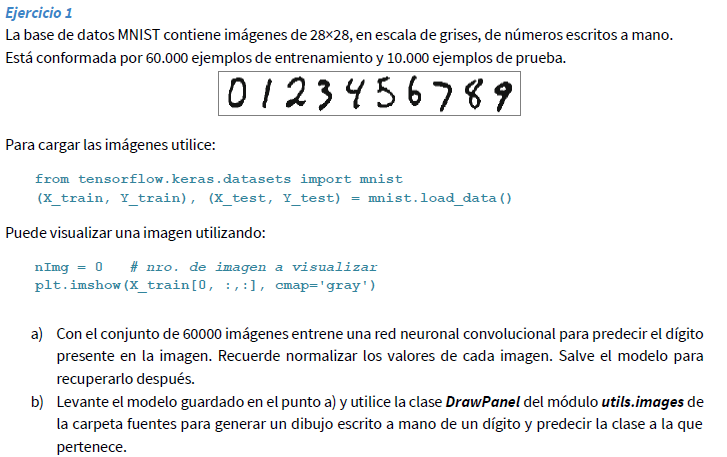

## Preparo dataset

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))

# dimension de las imagenes sacadas del primer ejmeplo
IMG_SHAPE = X_train[0].shape # (28,28)
TARGET_CNT= len(Y_train[0])  # 10 dígitos/clases

# nro. de imagen a visualizar
#plt.imshow(X_train[0, :,:], cmap='gray')

# normalización
X_train = X_train / 255
X_test  = X_test  / 255



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

## Genero modelo

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential


# %% Construccion del modelo
model = Sequential()

'''model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=[*IMG_SHAPE, 1] ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(TARGET_CNT, activation='softmax'))

'''
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=[*IMG_SHAPE, 1] ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='leaky_relu'))
model.add(Dense(TARGET_CNT, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Peter\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

## Entreno modelo

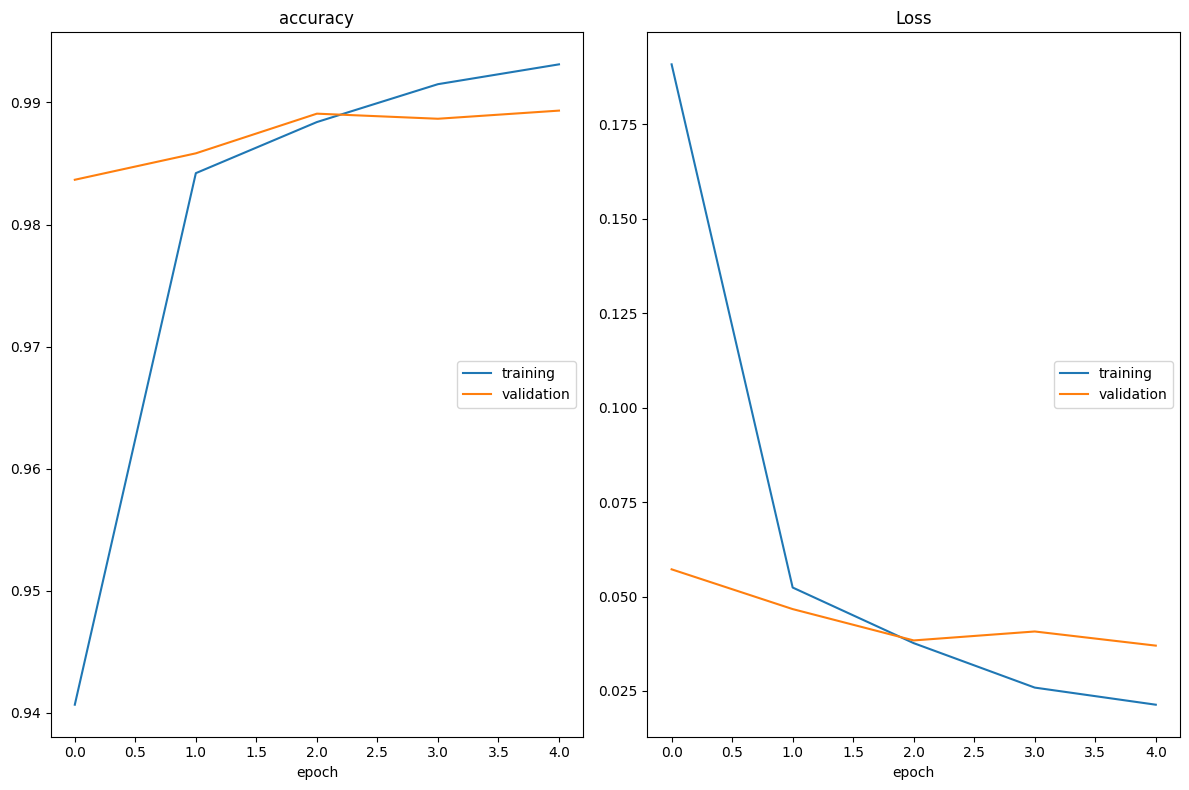

accuracy
	training         	 (min:    0.941, max:    0.993, cur:    0.993)
	validation       	 (min:    0.984, max:    0.989, cur:    0.989)
Loss
	training         	 (min:    0.021, max:    0.191, cur:    0.021)
	validation       	 (min:    0.037, max:    0.057, cur:    0.037)
480/480 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9893 - val_loss: 0.0370
Epoch 6/25
406/480 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9959 - loss: 0.0123

KeyboardInterrupt: 

In [3]:
import seaborn as sns
from sklearn import metrics
import tensorflow as tf

LOTES  = 100
EPOCAS = 25
PACIENCIA = 5 # Una buena regla es que sea del 10% al 20% de las epocas (siempre arrancar con menos)

from livelossplot import PlotLossesKeras

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True)

# %% Entrenamiento del modelo usando datos de entrenamiento y validacion
H = model.fit(x=X_train, y=Y_train, batch_size=LOTES,
              epochs=EPOCAS, validation_split=0.2, callbacks=[PlotLossesKeras(), early_stop], verbose=1)


fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")


print (X_train.shape)
pred = model.predict(X_train)

cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')


# %% evalua el modelo para entrenamiento y testeo
pred = model.evaluate(X_train, Y_train, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

## Salvo el modelo

In [5]:
model.save('MNIST_conv_model.keras')

## Recupero modelo

In [6]:
from tensorflow.keras.models import load_model

model = load_model('MNIST_conv_model.keras')

## Voy a la ruta donde tengo funcion para dibujar

In [7]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

## Dibujo digito y realizo prediccion

In [8]:
import pygame
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Inicializar pygame
pygame.init()

# Dimensiones del panel de dibujo (ajustado para 200x200 píxeles)
WIDTH, HEIGHT = 200, 200
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Crear la pantalla
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Dibuja un dígito")

# Llenar la pantalla de blanco
screen.fill(WHITE)

# Variable para salir del bucle
drawing = False

def draw_circle(screen, x, y):
    pygame.draw.circle(screen, BLACK, (x, y), 10)

# Bucle principal de pygame
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        # Iniciar el dibujo al hacer clic
        if event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True

        # Detener el dibujo al soltar el botón
        if event.type == pygame.MOUSEBUTTONUP:
            drawing = False

        # Dibujar mientras el mouse se mueve y el botón está presionado
        if event.type == pygame.MOUSEMOTION and drawing:
            x, y = event.pos
            draw_circle(screen, x, y)

    pygame.display.update()

# Guardar la imagen dibujada
pygame.image.save(screen, "digit.png")

# Cerrar pygame
pygame.quit()

# Cargar la imagen y redimensionarla a 28x28 para el modelo
img = Image.open("digit.png").convert('L')  # Convertir a escala de grises
img = img.resize((28, 28))  # Redimensionar a 28x28
img_array = np.array(img)

# Invertir los colores (si lo dibujas en negro sobre fondo blanco)
img_array = 255 - img_array

# Normalizar la imagen
img_array = img_array / 255.0

# Redimensionar la imagen para que tenga la forma correcta (1, 28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

# Cargar el modelo de TensorFlow
model = load_model('MNIST_conv_model.h5')

# Hacer la predicción
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

print(f"El dígito predicho es: {predicted_class[0]}") 

pygame 2.6.1 (SDL 2.28.4, Python 3.12.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
El dígito predicho es: 9


## **!!! No me reconoce el 9**

## Modifique el stride y agregue mas capas, ahora funciona mejor &#128512;